In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
df_index = pd.read_csv('economic_index.csv')

In [4]:
df_index.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [5]:
# Drop unneccessary columns
df_index.drop(columns=['Unnamed: 0','year','month'], axis=1,inplace=True)

In [6]:
import seaborn as sns

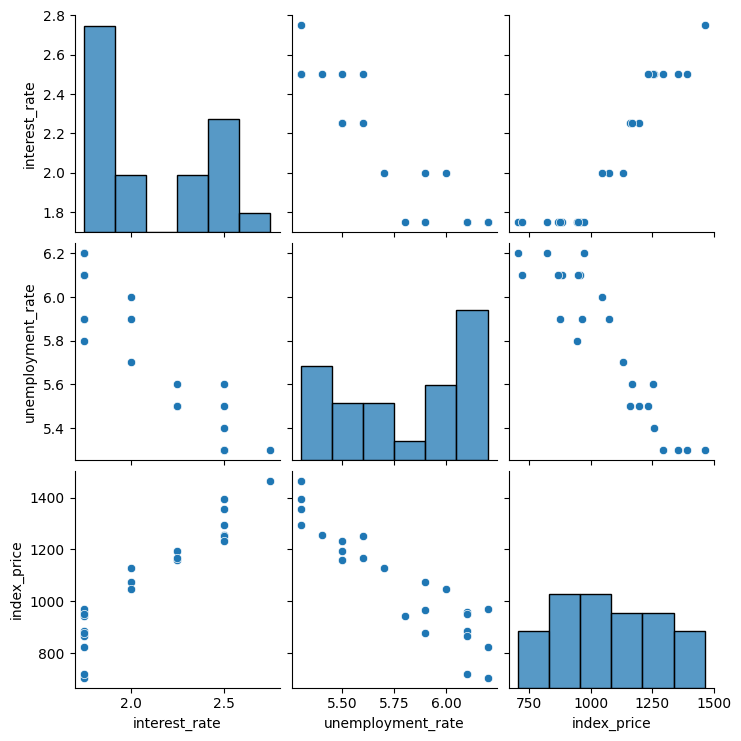

In [7]:
sns.pairplot(df_index)

In [8]:
df_index.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


Text(0, 0.5, 'Unemployment Rate')

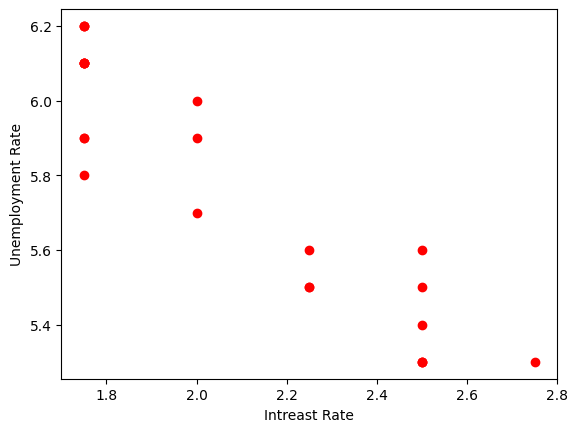

In [9]:
# Visualization
plt.scatter(df_index['interest_rate'],df_index['unemployment_rate'],color='r')
plt.xlabel('Intreast Rate')
plt.ylabel('Unemployment Rate')

In [10]:
# Independent and dependent feature
X = df_index.iloc[:,:-1]
y = df_index.iloc[:,-1]

In [11]:
# train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [12]:
import seaborn as sns

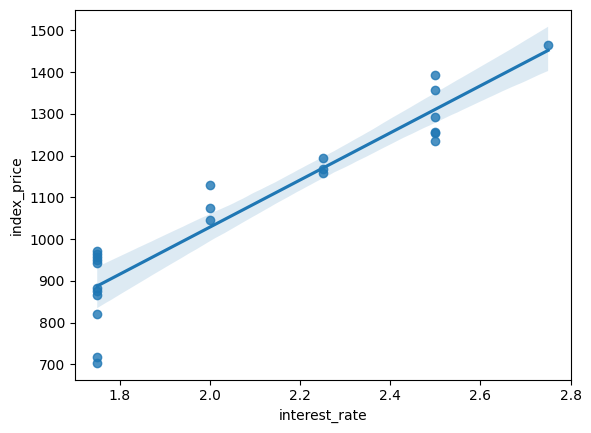

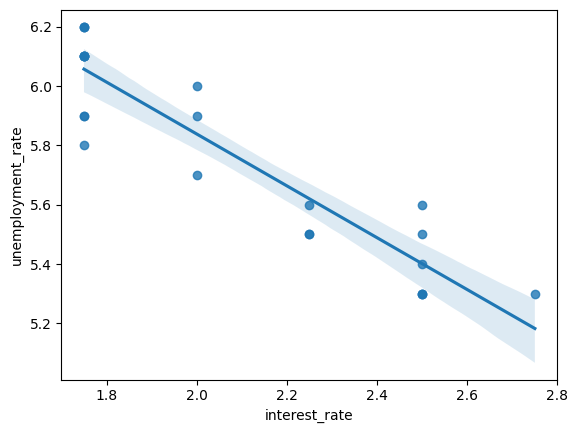

In [13]:
sns.regplot(x=df_index['interest_rate'],y=df_index['index_price'])
plt.show()
sns.regplot(x=df_index['interest_rate'],y=df_index['unemployment_rate'])
plt.show()

In [14]:
# Standardization
from sklearn.preprocessing import StandardScaler

In [15]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
Regression = LinearRegression()

In [18]:
Regression.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [ ]:
# Cross Validation:
from sklearn.model_selection import cross_val_score
validation_score = cross_val_score(Regression,X_train,y_train,
                                   scoring='neg_mean_squared_error',
                                   cv=3)

In [20]:
validation_score

array([-4921.61331265, -7686.87497294, -5135.9962549 ])

In [21]:
# Prediction
y_pred = Regression.predict(X_test)

In [22]:
y_pred

array([1180.7466813 ,  802.74279699, 1379.83457045,  838.52599602,
        973.85313963, 1144.96348227])

In [23]:
# Performanace Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

8108.567426306604
73.80444932337097
90.04758423359621


In [24]:
from sklearn.metrics import r2_score
score = r2_score(y_test,y_pred)
print(score)

0.7591371539010257


In [25]:
# Display adjusted R-square
print(1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

0.5985619231683761


In [26]:
# Assumptions

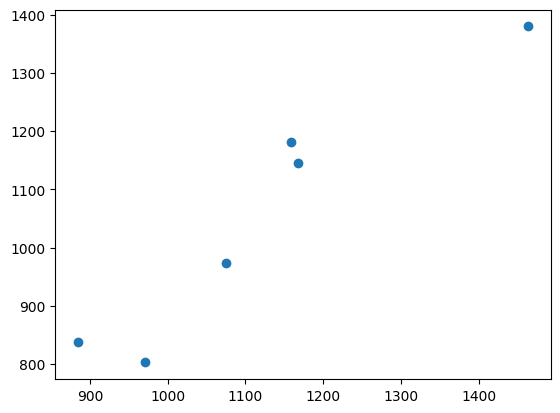

In [27]:
plt.scatter(y_test,y_pred)

In [28]:
residuals = y_test - y_pred
print(residuals)

8     -21.746681
16    168.257203
0      84.165430
18     45.474004
11    101.146860
9      22.036518
Name: index_price, dtype: float64


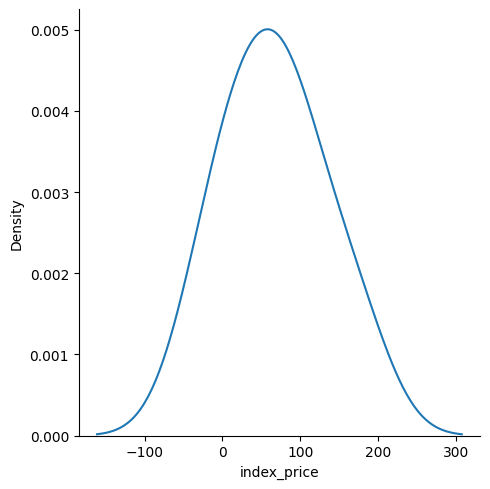

In [29]:
# Plot this residuals
sns.displot(residuals,kind='kde')

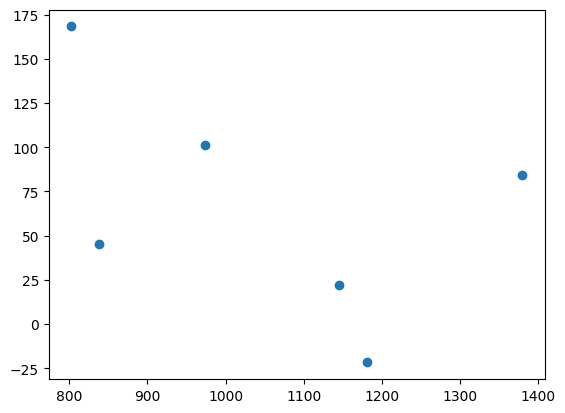

In [30]:
# Scatter Plot with respect to prediction and residuals
plt.scatter(y_pred,residuals)